In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [2]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,Normalizer

In [8]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [9]:
X.duplicated().sum()

0

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [12]:
x_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [15]:
import matplotlib.pyplot as plt


Explained Variance Ratio:
 [0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


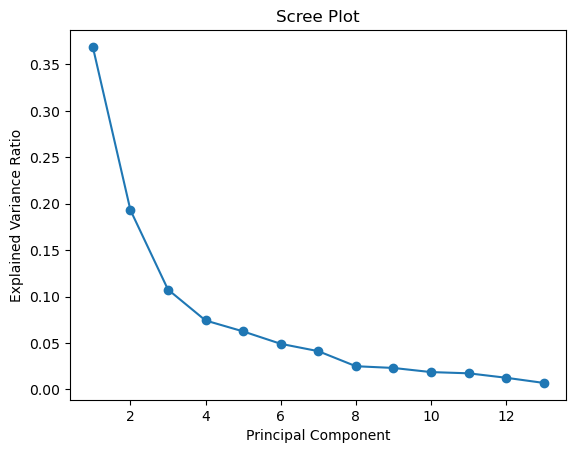

In [20]:
pca=PCA(n_components=13)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_,marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


Explained Variance Ratio:
 [0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855]


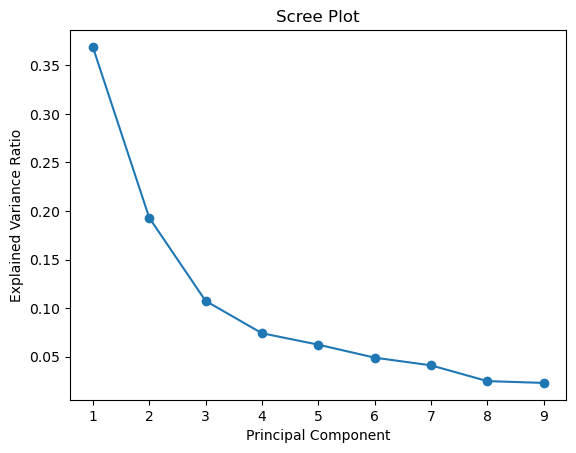

In [21]:
pca=PCA(n_components=9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_,marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [23]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='k-means++')

In [31]:
km.fit(x_train_pca)

C:\Users\Sumanth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sumanth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [32]:
km.predict(x_test_pca)

array([0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0])

In [33]:
y_test

,class
54,1
151,3
63,2
55,1
123,2
121,2
7,1
160,3
106,2
90,2


In [34]:
labels=km.labels_
centroids=km.cluster_centers_

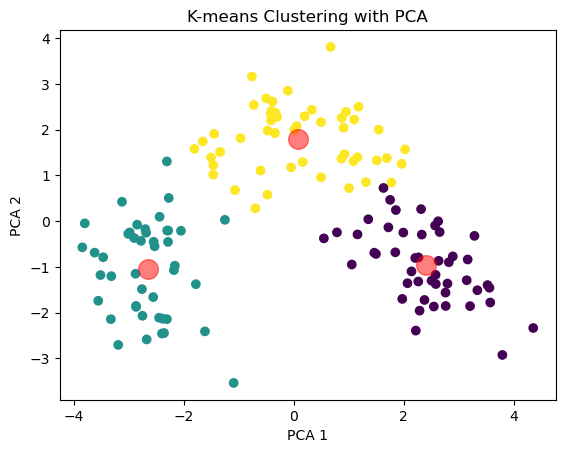

In [35]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering with PCA')
plt.show()

In [36]:
km.inertia_

895.8562250891962

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,km.predict(x_test_pca))

0.3888888888888889